In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(purrr))
suppressMessages(library(readr))

In [2]:
batches <- c("11T", '12N', '12T', '13T', '19T',"10N", '10T', '18T', '20T', '21T','22T')

In [3]:
# 为每个批次生成文件名
save_dataPath = "/data/hanxue/BCY_ATAC/scATAC/predictedCellType/"
files <- paste0(save_dataPath, batches, "_predictedCellType.csv")

# 读取并合并所有的csv文件
df <- files %>% 
  map_df(read_csv)

New names:
• `` -> `...1`
Rows: 8777 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ...1, predicted.id
dbl (1): prediction.score.max

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 4494 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ...1, predicted.id
dbl (1): prediction.score.max

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 12338 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ...1, predicted.id
dbl (1): prediction.score.max

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify 

In [8]:
# 过滤掉标签预测质量差的
table(df$prediction.score.max>0.9)
table(df$prediction.score.max>0.5)
svg("/data/hanxue/BCY_ATAC/joint_output/prediction-score.svg", width = 8, height = 6)
hist(df$prediction.score.max) 
abline(v = 0.9, col = "red") 
abline(v = 0.5, col = "red") 
dev.off()


FALSE  TRUE 
34007 70276 


FALSE  TRUE 
 7335 96948 

pdf 
  2

In [30]:
colnames(df)[1] <- "cell"
df <- subset(df, subset = prediction.score.max > 0.5)

In [2]:
proj <- loadArchRProject("./ArchRProject", showLogo = FALSE)

Successfully loaded ArchRProject!



In [32]:
# 将预测的细胞类型添加到ArchR项目的cellColData中
proj@cellColData$predictedCellType <- df$predicted.id[match(rownames(proj@cellColData), df$cell)]

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-11bc8b544ba5bf-Date-2025-03-06_Time-06-43-37.073055.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-11bc8b544ba5bf-Date-2025-03-06_Time-06-43-37.073055.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-11bc8b599a3f4-Date-2025-03-06_Time-06-43-37.984423.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-11bc8b599a3f4-Date-2025-03-06_Time-06-43-37.984423.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-11bc8b2432b666-Date-2025-03-06_Time-06-43-38.88386.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-11bc8b2432b666-Date-2025-03-06_Time-06-43-38.88386.log

ArchR logging to : ArchRLogs/ArchR-plotEmb

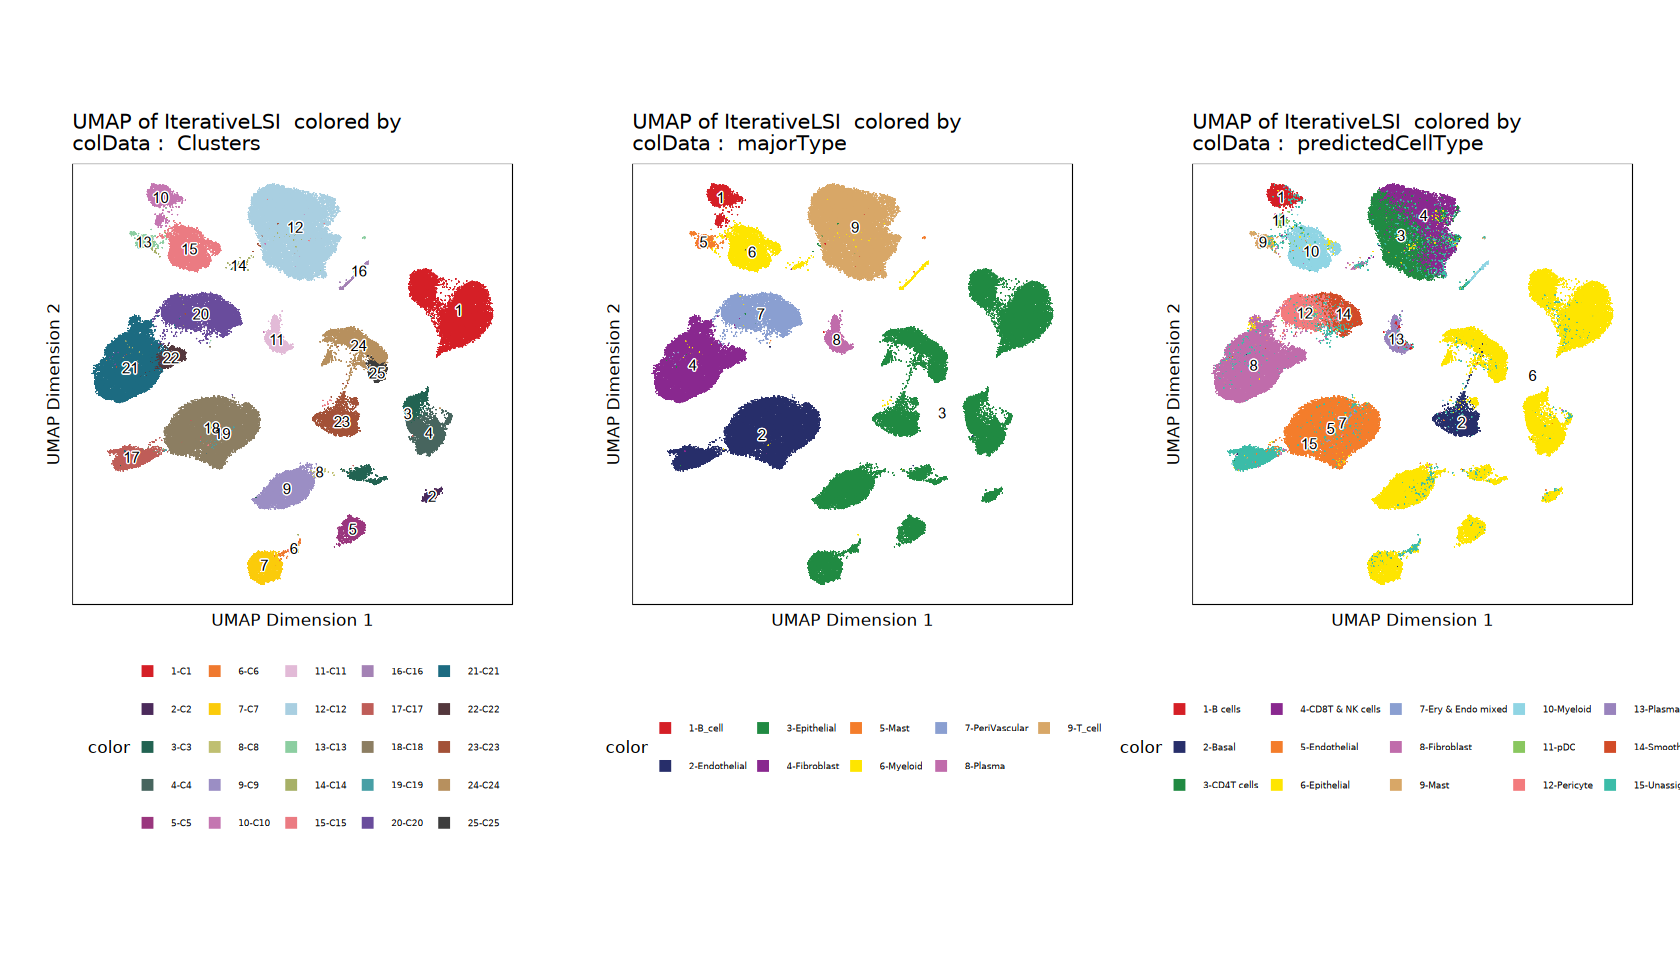

In [ ]:
## 可视化
options(repr.plot.height = 8, repr.plot.width = 14)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Clusters", 
    embedding = "UMAP"
    )

p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "majorType", 
    embedding = "UMAP"
    )

p3 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "predictedCellType", 
    embedding = "UMAP"
    )
p4 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP"
    )
ggsave("/data/hanxue/BCY_ATAC/joint_output/UMAP-Clusters.svg",plot = p1, device = "svg")
ggsave("/data/hanxue/BCY_ATAC/joint_output/UMAP-MajorType.svg",plot = p2, device = "svg")
ggsave("/data/hanxue/BCY_ATAC/joint_output/UMAP-PredictedCellType.svg",plot = p3, device = "svg")
ggAlignPlots(p1, p2, p3, type = "h")

In [15]:
plotPDF(p1, p2, p3, p4, name = "UMAP-Clusters-MajorType-PredictionType-Sample.pdf", ArchRProj = proj, addDOC = FALSE, width = 8, height = 8)

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-11bc8b38d86281-Date-2025-03-06_Time-06-42-35.095662.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-11bc8b38d86281-Date-2025-03-06_Time-06-42-35.095662.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-11bc8b19cbfc9e-Date-2025-03-06_Time-06-42-35.814009.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-11bc8b19cbfc9e-Date-2025-03-06_Time-06-42-35.814009.log

Saving 7 x 7 in image


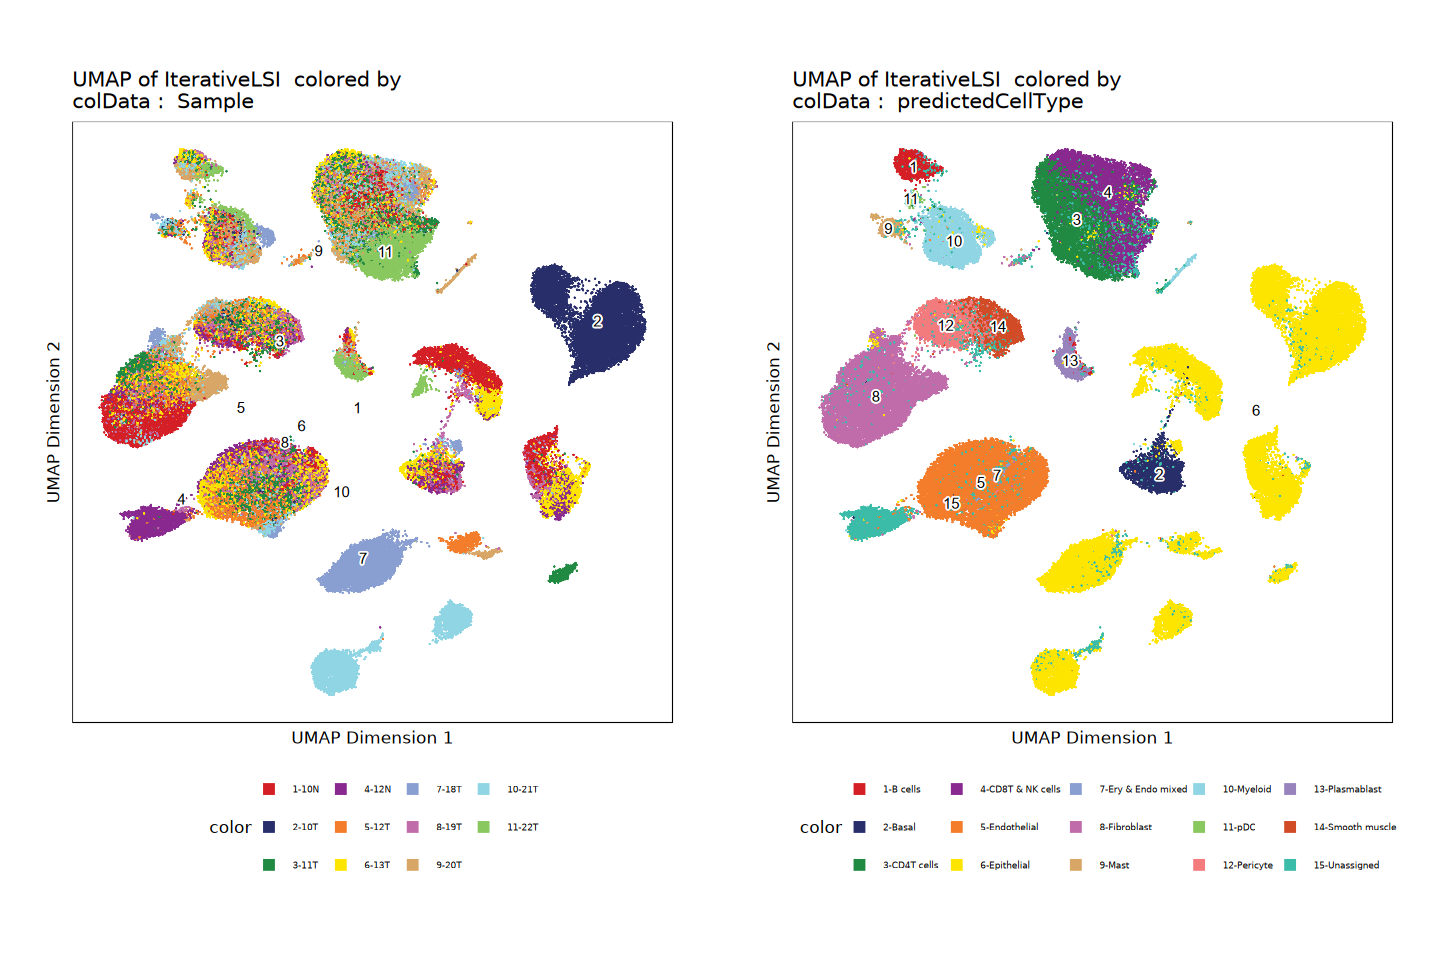

In [12]:
## 可视化
options(repr.plot.height = 8, repr.plot.width = 12)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP"
    )

# p2 <- plotEmbedding(
#     ArchRProj = proj, 
#     colorBy = "cellColData", 
#     name = "majorType", 
#     embedding = "UMAP"
#     )

p3 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "predictedCellType", 
    embedding = "UMAP"
    )
ggsave("/data/hanxue/BCY_ATAC/joint_output/UMAP-Sample.svg",plot = p1, device = "svg")
ggAlignPlots(p1, p3, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-31a5f25a80818-Date-2025-02-25_Time-12-24-59.412883.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-31a5f25a80818-Date-2025-02-25_Time-12-24-59.412883.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-31a5f6461da0e-Date-2025-02-25_Time-12-24-59.899904.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-31a5f6461da0e-Date-2025-02-25_Time-12-24-59.899904.log



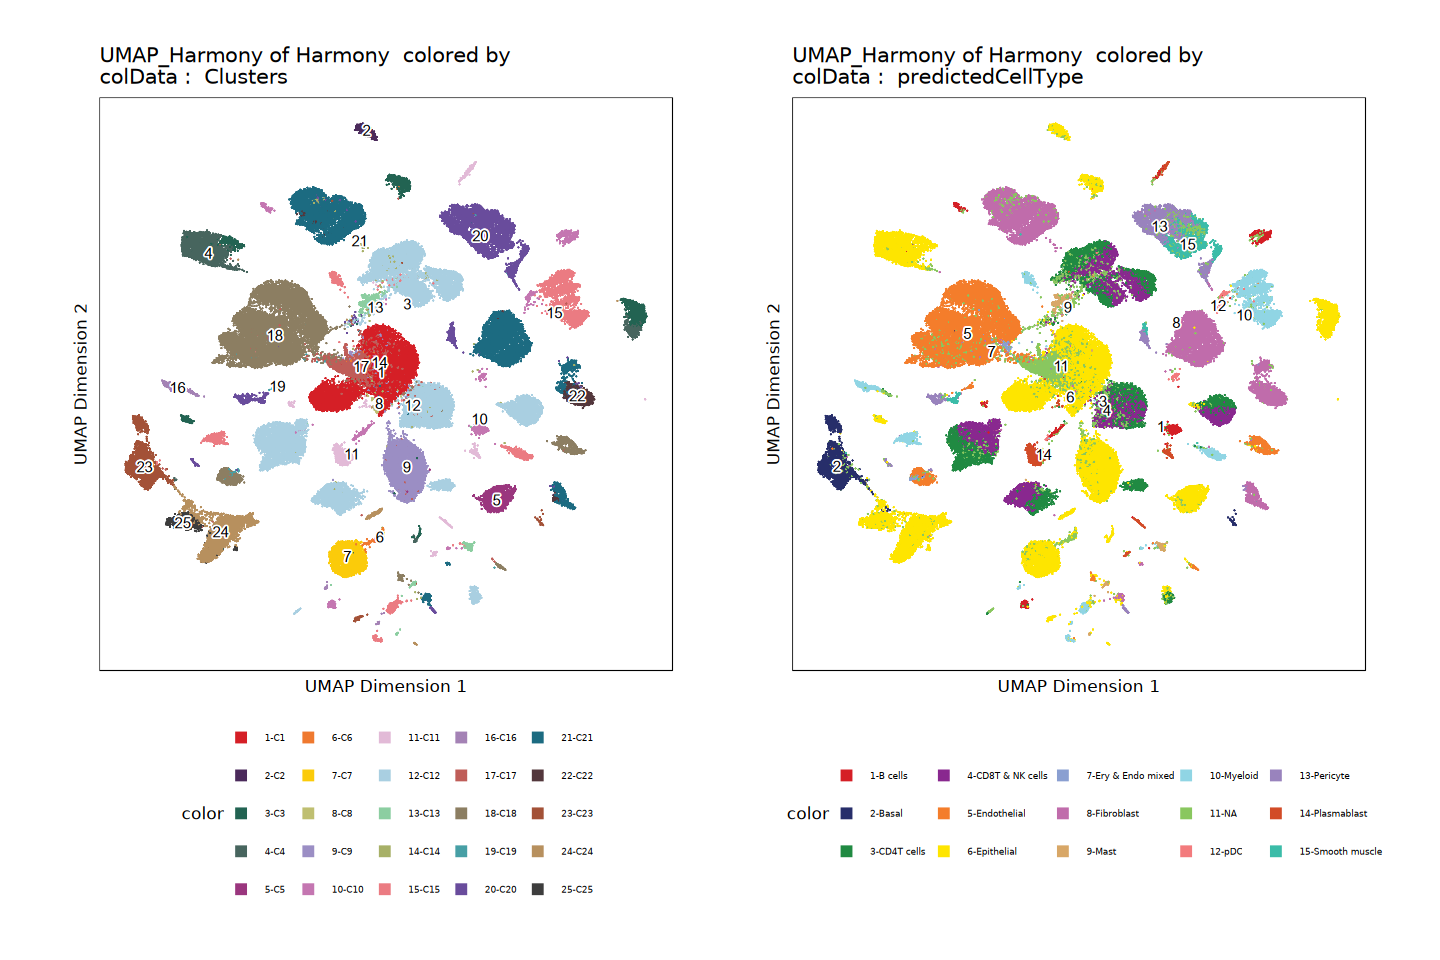

In [35]:
## 可视化
options(repr.plot.height = 8, repr.plot.width = 12)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Clusters", 
    embedding = "UMAP_Harmony"
    )

# p2 <- plotEmbedding(
#     ArchRProj = proj, 
#     colorBy = "cellColData", 
#     name = "majorType", 
#     embedding = "UMAP_Harmony"
#     )

p3 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "predictedCellType", 
    embedding = "UMAP_Harmony"
    )
ggAlignPlots(p1, p3, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-31a5f6bb403e8-Date-2025-02-25_Time-12-25-07.096608.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-31a5f6bb403e8-Date-2025-02-25_Time-12-25-07.096608.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-31a5f5f8a4cc9-Date-2025-02-25_Time-12-25-07.509457.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-31a5f5f8a4cc9-Date-2025-02-25_Time-12-25-07.509457.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-31a5f6754481-Date-2025-02-25_Time-12-25-07.972466.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-31a5f6754481-Date-2025-02-25_Time-12-25-07.972466.log



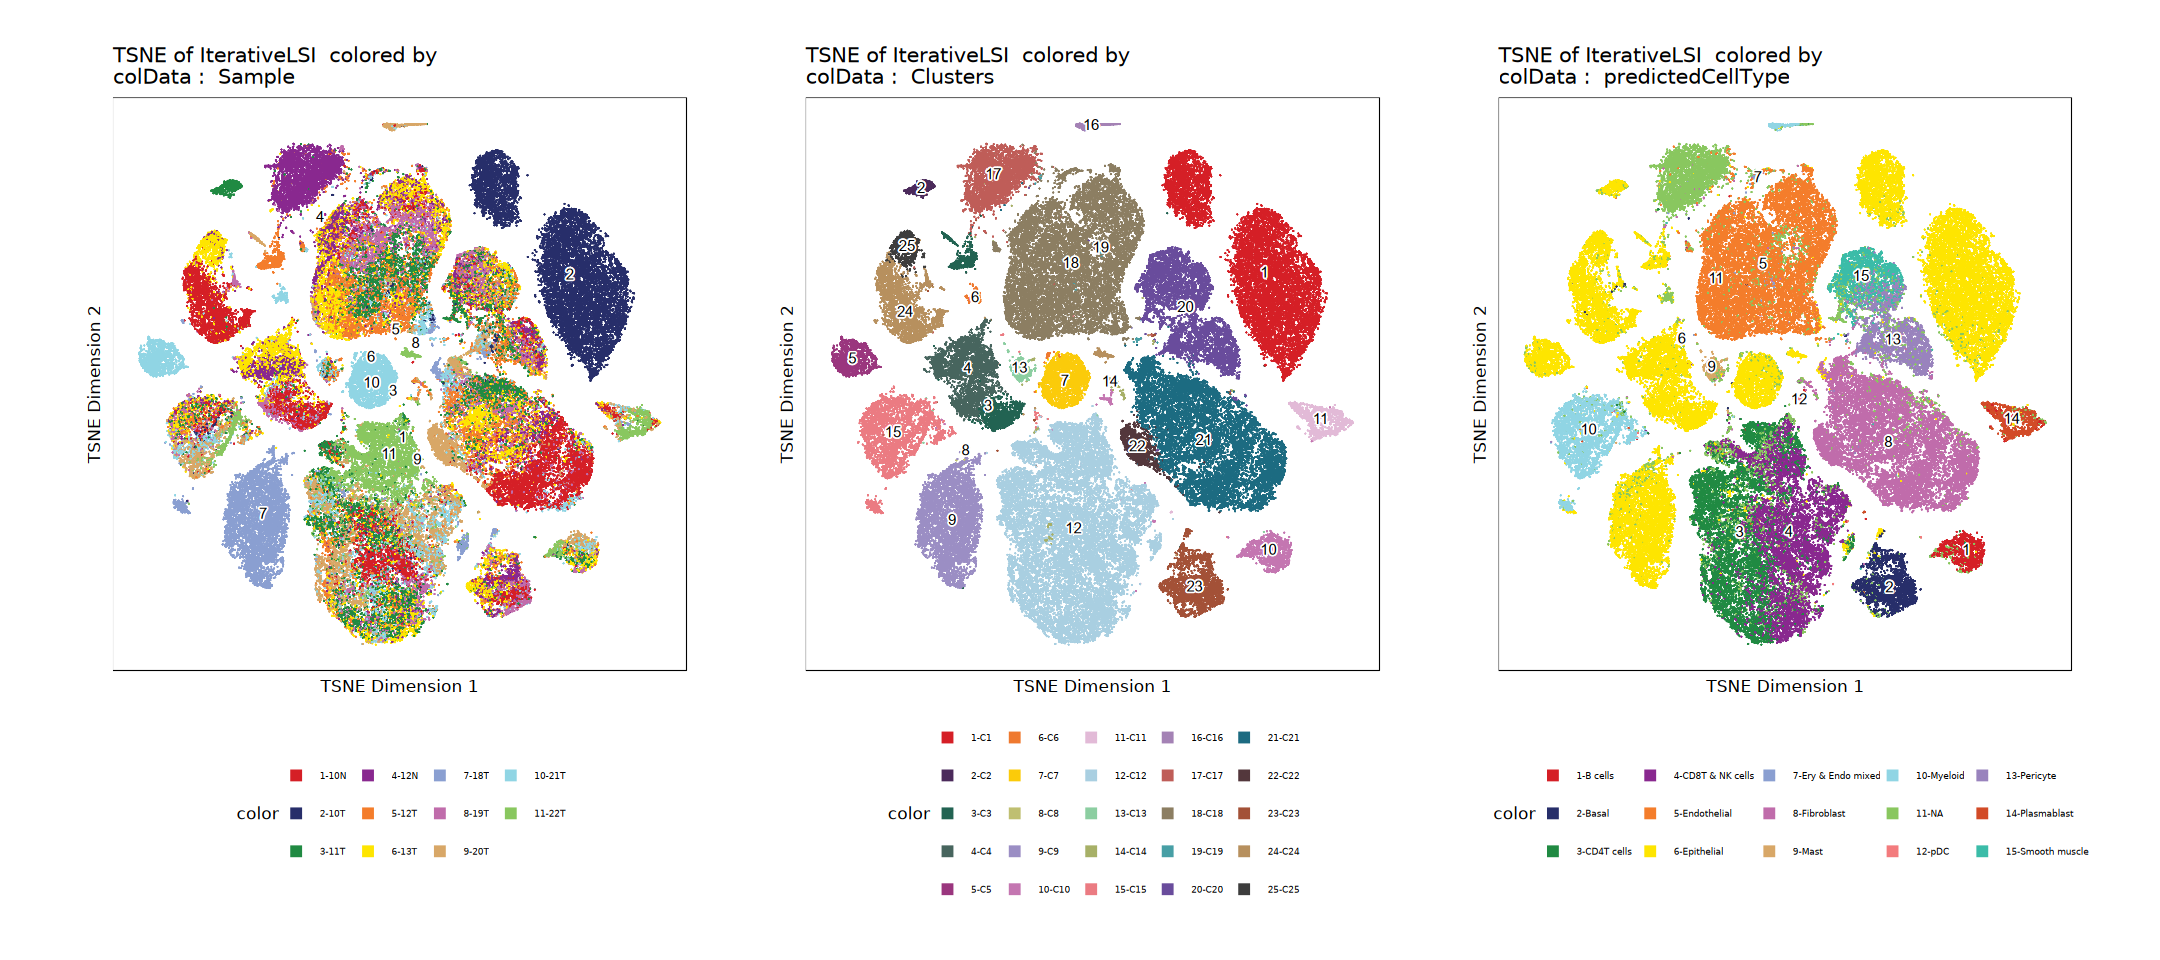

In [36]:
## 可视化
options(repr.plot.height = 8, repr.plot.width = 18)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "TSNE"
    )

p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Clusters", 
    embedding = "TSNE"
    )

p3 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "predictedCellType", 
    embedding = "TSNE"
    )
ggAlignPlots(p1, p2, p3, type = "h")

In [37]:
# 将 proj$predictedCellType 为 NA 的设置为 "Unassigned"
proj$predictedCellType[is.na(proj$predictedCellType)] <- "Unassigned"

In [38]:
table(proj$predictedCellType)


         B cells            Basal       CD4T cells  CD8T & NK cells 
            1180             2205             7085             7323 
     Endothelial       Epithelial Ery & Endo mixed       Fibroblast 
           11456            26828              115            11072 
            Mast          Myeloid              pDC         Pericyte 
             502             3790              167             3009 
     Plasmablast    Smooth muscle       Unassigned 
            1102             1935             8248 

In [39]:
## 保存结果
saveArchRProject(proj, load = FALSE)

Saving ArchRProject...



In [40]:
## 12N-10N
# 为每个批次生成文件名
batches <- c("12N")
save_dataPath = "/data/xwt/BCY_ATAC/scATAC/predictedCellType/"
files <- paste0(save_dataPath, batches, "_predictedCellType_12N10N.csv")

# 读取并合并所有的csv文件
df <- files %>% 
  map_df(read_csv)

ERROR: [1m[33mError[39m in `map()`:[22m
[1m[22m[36mℹ[39m In index: 1.
[1mCaused by error:[22m
[33m![39m '/data/xwt/BCY_ATAC/scATAC/predictedCellType/12N_predictedCellType_12N10N.csv' does not exist.



FALSE  TRUE 
 2780  1714 


FALSE  TRUE 
  492  4002 

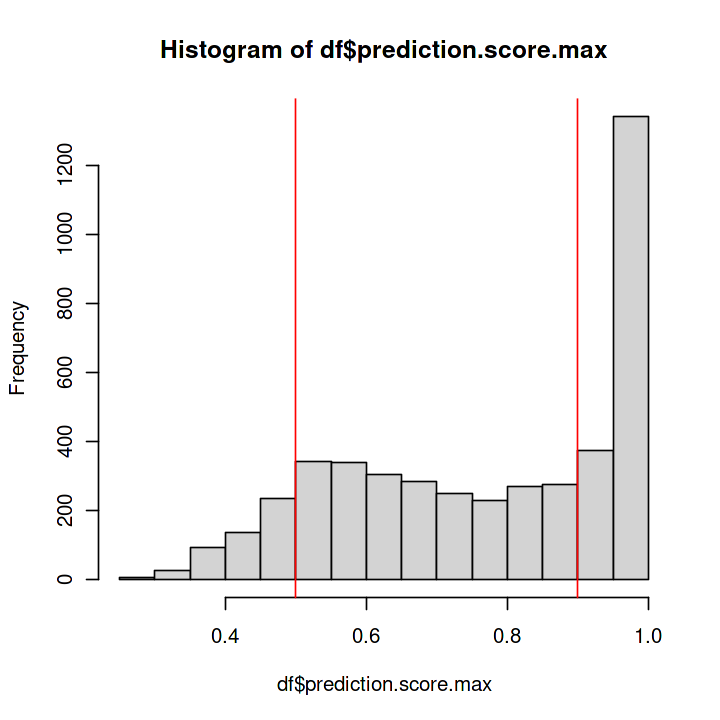

In [ ]:
# 过滤掉标签预测质量差的
options(repr.plot.height = 6, repr.plot.width = 6)
table(df$prediction.score.max>0.9)
table(df$prediction.score.max>0.5)
hist(df$prediction.score.max) 
abline(v = 0.9, col = "red") 
abline(v = 0.5, col = "red") 

In [ ]:
colnames(df)[1] <- "cell"
df <- subset(df, subset = prediction.score.max > 0.5)
# 将预测的细胞类型添加到ArchR项目的cellColData中
proj@cellColData$predictedCellType1 <- df$predicted.id[match(rownames(proj@cellColData), df$cell)]

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3dba5c44147e53-Date-2024-09-09_Time-12-00-47.764575.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3dba5c44147e53-Date-2024-09-09_Time-12-00-47.764575.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3dba5c7a91b7dd-Date-2024-09-09_Time-12-00-48.159608.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3dba5c7a91b7dd-Date-2024-09-09_Time-12-00-48.159608.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3dba5c36d023e5-Date-2024-09-09_Time-12-00-48.516866.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embed

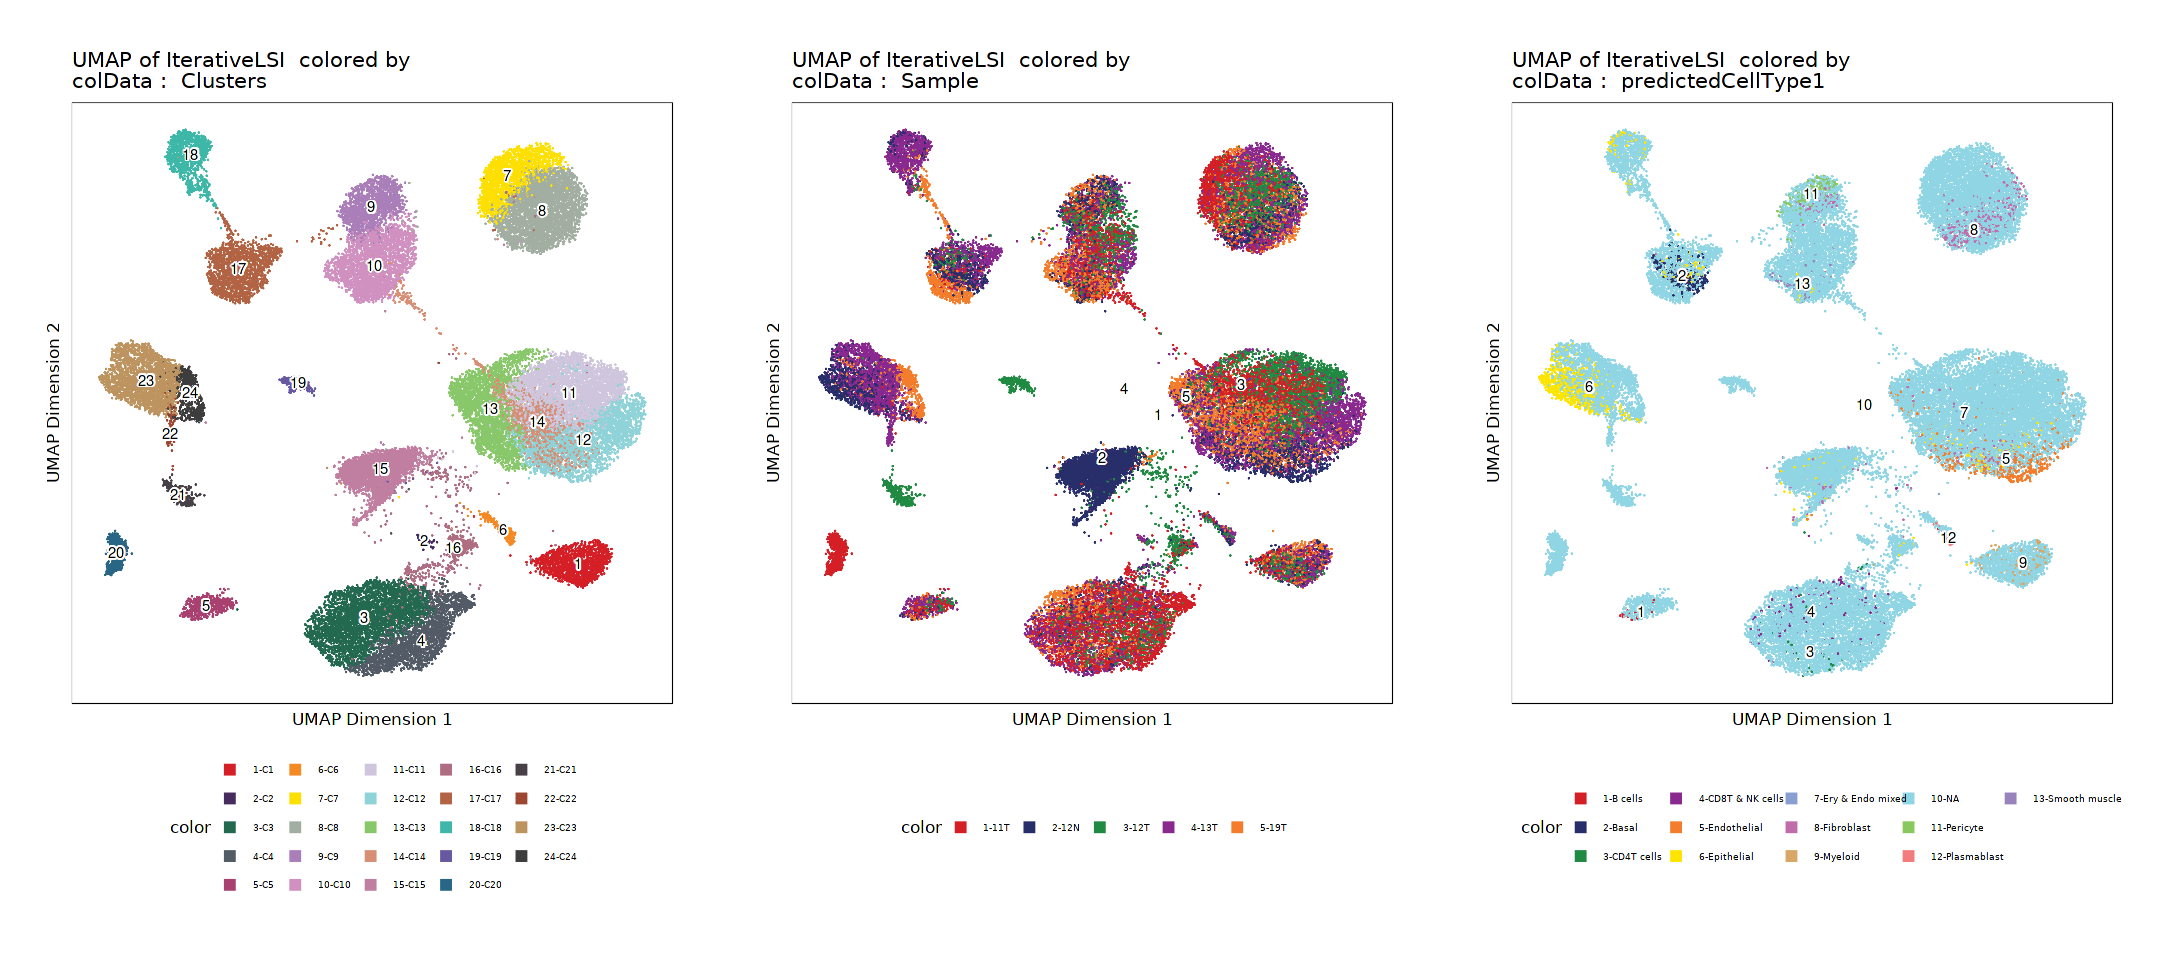

In [ ]:
## 可视化
options(repr.plot.height = 8, repr.plot.width = 18)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Clusters", 
    embedding = "UMAP"
    )

p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP"
    )

p3 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "predictedCellType1", 
    embedding = "UMAP"
    )
ggAlignPlots(p1, p2, p3, type = "h")

In [ ]:
## 12N-12T
# 为每个批次生成文件名
batches <- c("12N")
save_dataPath = "/data/xwt/BCY_ATAC/scATAC/predictedCellType/"
files <- paste0(save_dataPath, batches, "_predictedCellType_12N12T.csv")

# 读取并合并所有的csv文件
df <- files %>% 
  map_df(read_csv)

New names:
• `` -> `...1`
Rows: 4494 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ...1, predicted.id
dbl (1): prediction.score.max

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



FALSE  TRUE 
 2080  2414 


FALSE  TRUE 
  337  4157 

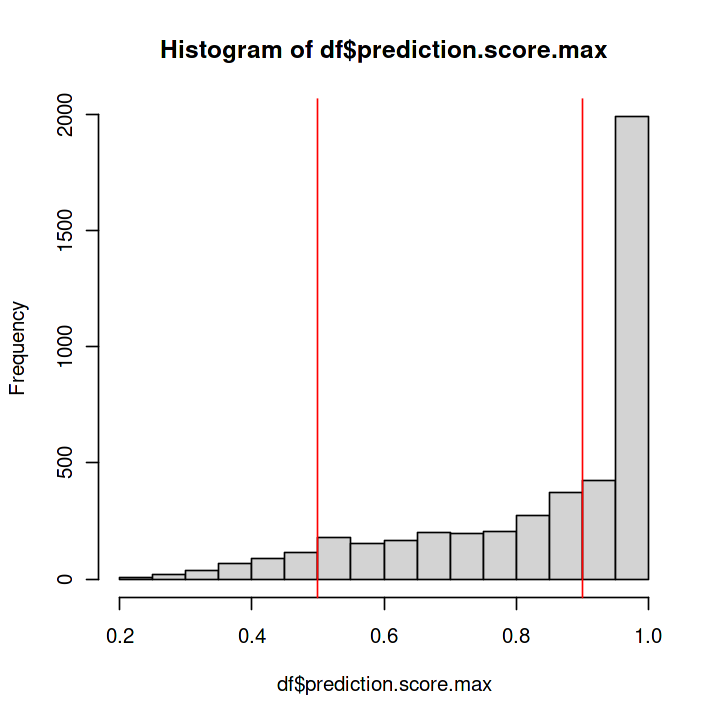

In [ ]:
# 过滤掉标签预测质量差的
options(repr.plot.height = 6, repr.plot.width = 6)
table(df$prediction.score.max>0.9)
table(df$prediction.score.max>0.5)
hist(df$prediction.score.max) 
abline(v = 0.9, col = "red") 
abline(v = 0.5, col = "red") 

In [ ]:
colnames(df)[1] <- "cell"
df <- subset(df, subset = prediction.score.max > 0.5)
# 将预测的细胞类型添加到ArchR项目的cellColData中
proj@cellColData$predictedCellType2 <- df$predicted.id[match(rownames(proj@cellColData), df$cell)]

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3dba5c206585e3-Date-2024-09-09_Time-12-01-15.427114.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3dba5c206585e3-Date-2024-09-09_Time-12-01-15.427114.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3dba5c2e9b9860-Date-2024-09-09_Time-12-01-15.820546.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3dba5c2e9b9860-Date-2024-09-09_Time-12-01-15.820546.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3dba5c2b59856e-Date-2024-09-09_Time-12-01-16.248719.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embed

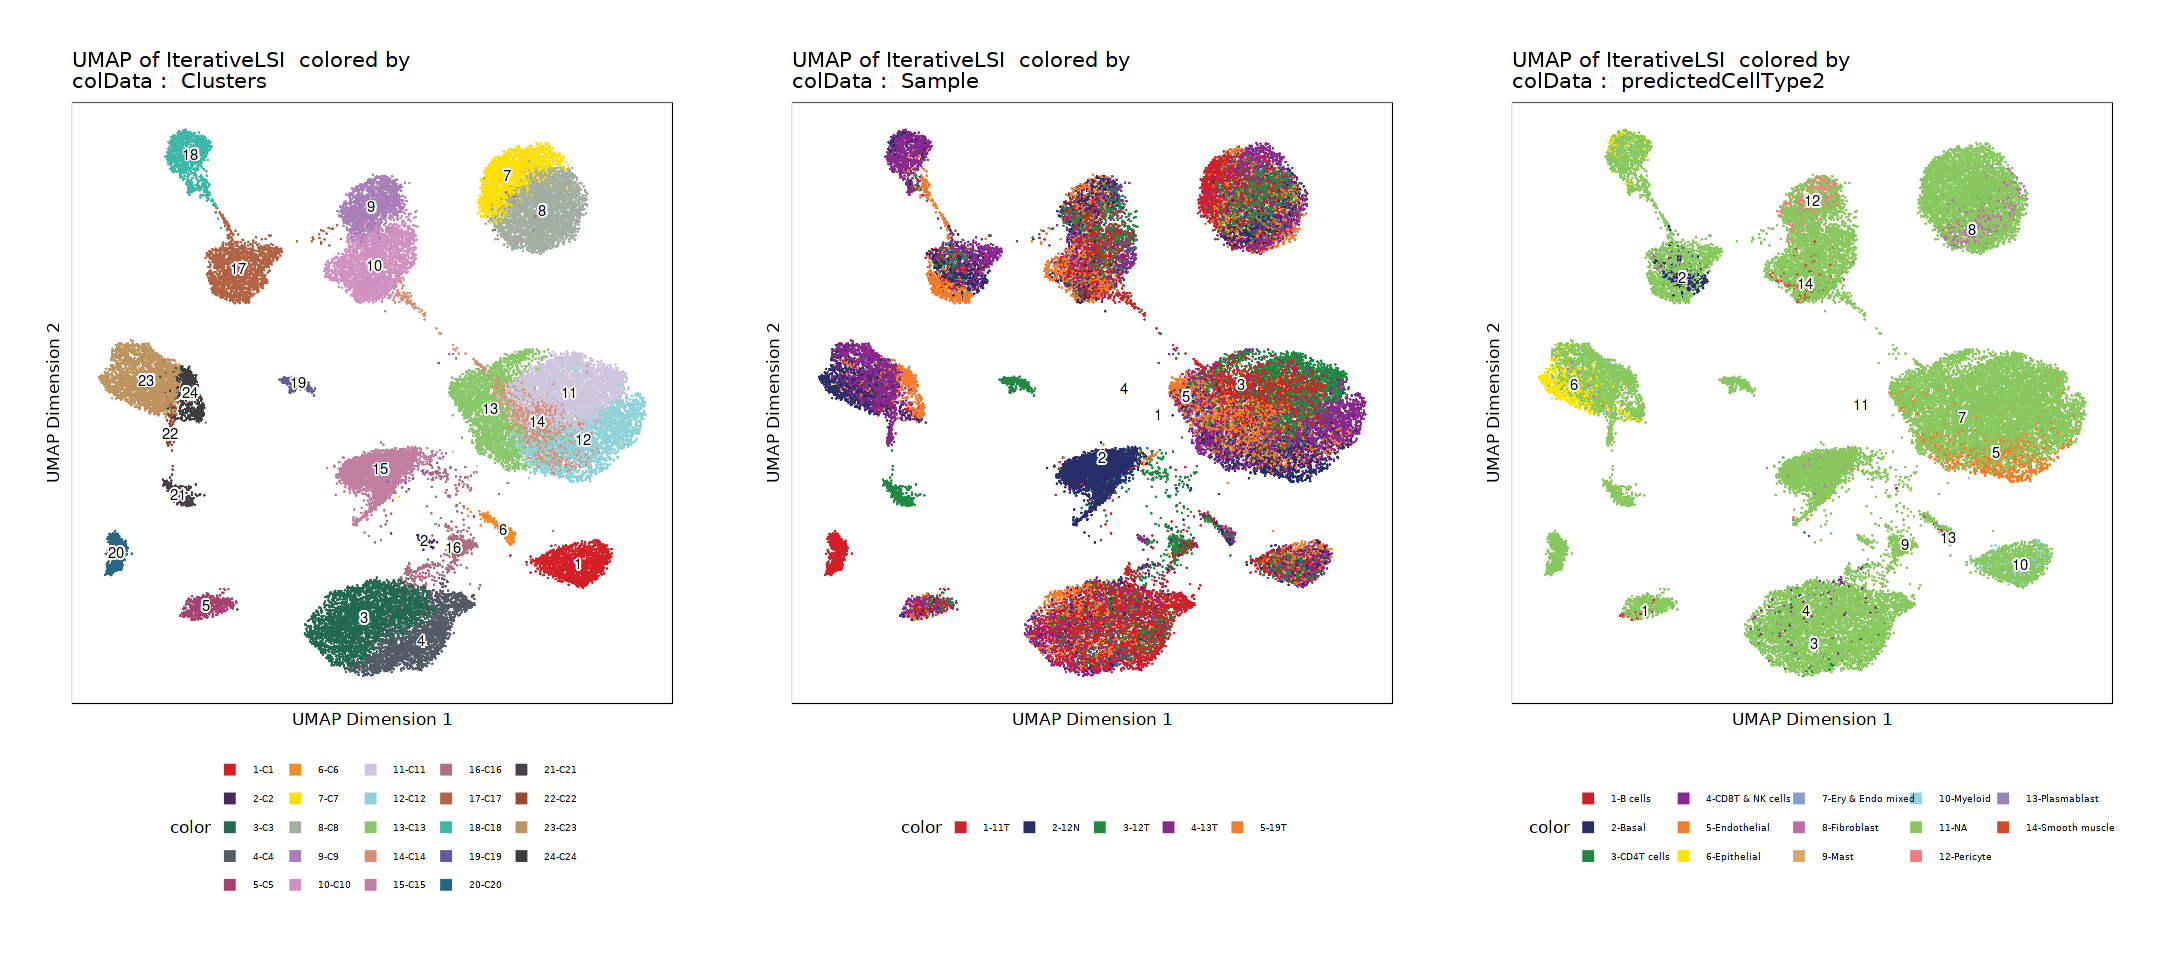

In [ ]:
## 可视化
options(repr.plot.height = 8, repr.plot.width = 18)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Clusters", 
    embedding = "UMAP"
    )

p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP"
    )

p3 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "predictedCellType2", 
    embedding = "UMAP"
    )
ggAlignPlots(p1, p2, p3, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3dba5c3622f853-Date-2024-09-09_Time-12-02-23.555118.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3dba5c3622f853-Date-2024-09-09_Time-12-02-23.555118.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3dba5c324bc776-Date-2024-09-09_Time-12-02-23.918841.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3dba5c324bc776-Date-2024-09-09_Time-12-02-23.918841.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3dba5c2d590106-Date-2024-09-09_Time-12-02-24.253748.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEm

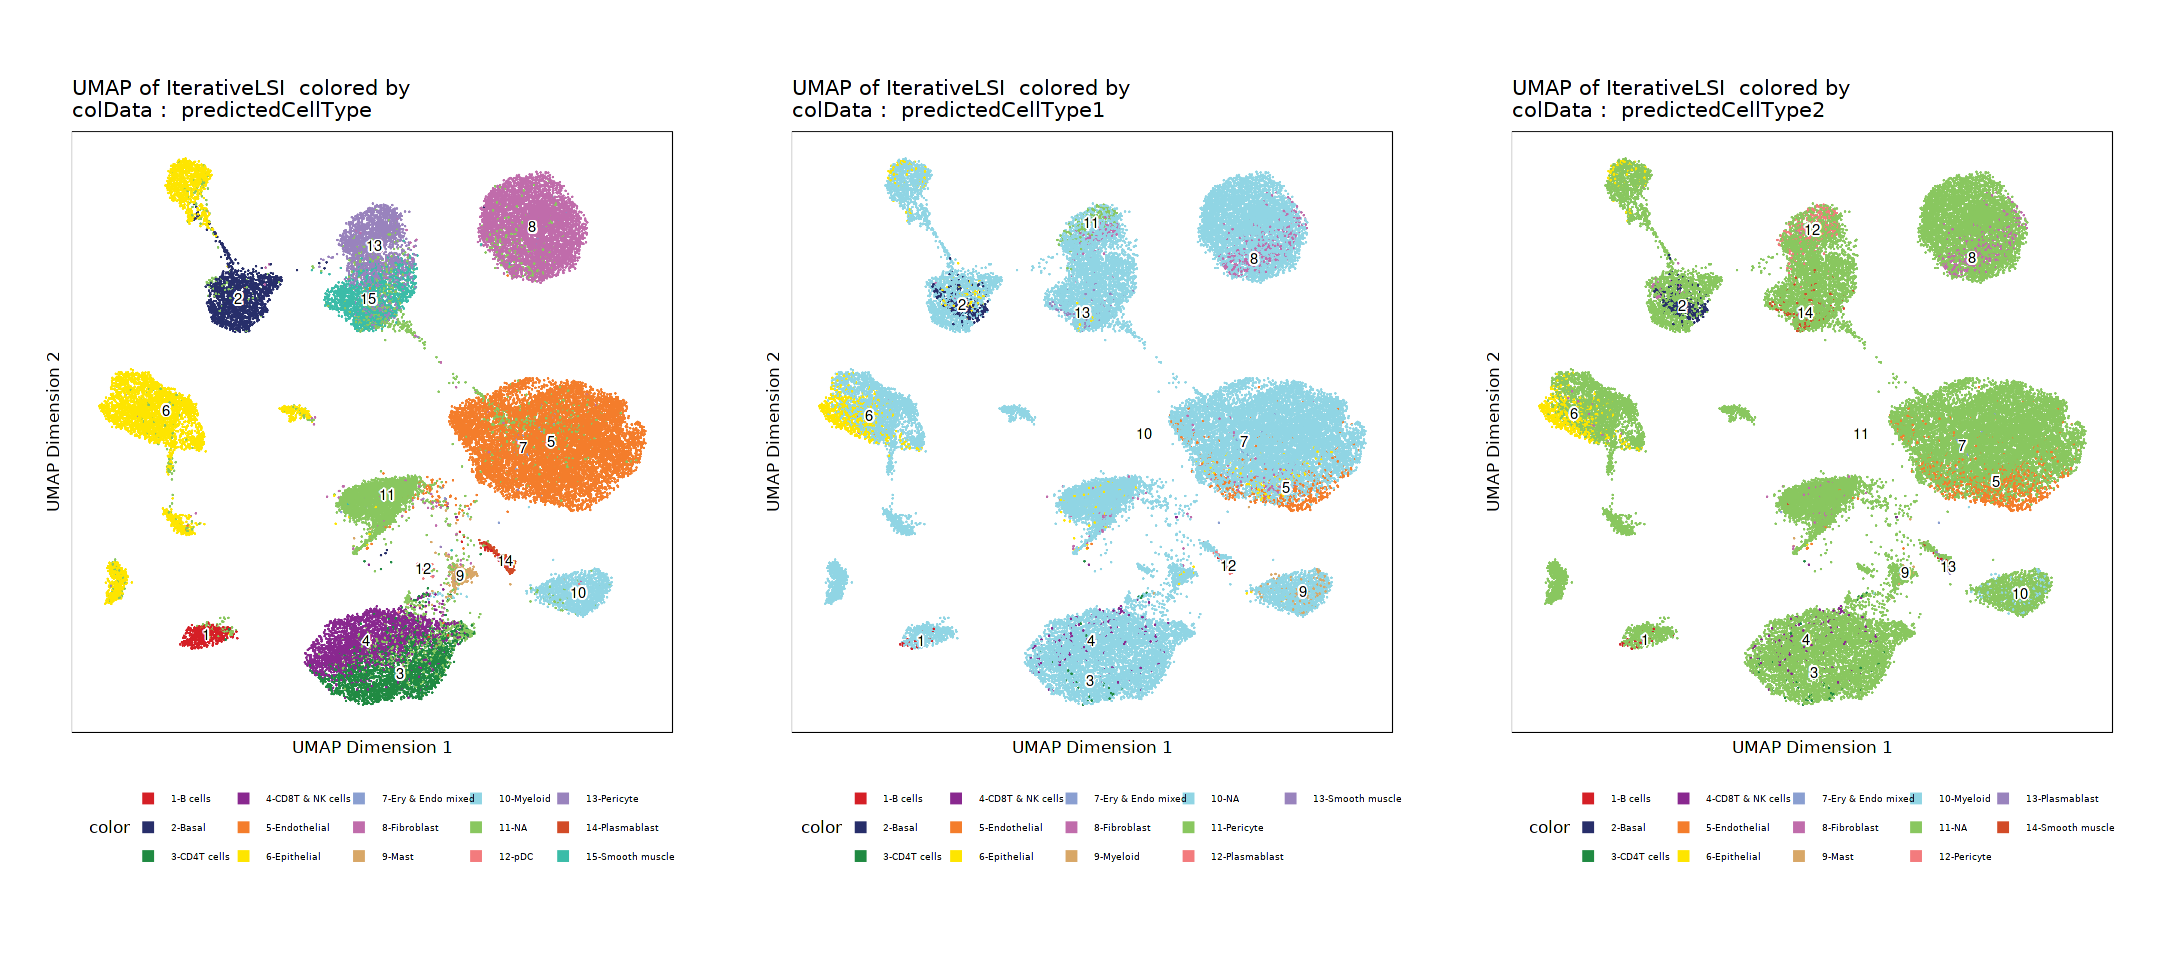

In [ ]:
## 可视化
options(repr.plot.height = 8, repr.plot.width = 18)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "predictedCellType", 
    embedding = "UMAP"
    )

p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "predictedCellType1", 
    embedding = "UMAP"
    )

p3 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "predictedCellType2", 
    embedding = "UMAP"
    )
ggAlignPlots(p1, p2, p3, type = "h")

In [3]:
seRNA <- readRDS("/home/hanxue/lab/scRNA/neoadjuvant/scRNA.rds") 

In [4]:
seRNA

Loading required package: SingleCellExperiment



class: SingleCellExperiment 
dim: 41733 89967 
metadata(24): annotation_colors batch_colors ... tsne umap
assays(1): X
rownames(41733): TNFRSF4 TNFRSF18 ... ENSG00000289538 ITGB2-AS1
rowData names(12): n_cells_by_counts mean_counts ... dispersions_norm
  varm
colnames(89967): AAACCTGAGTACGCCC-1-10T AAACCTGCACATTTCT-1-10T ...
  TTTGTCATCTACTTAC-1-22T TTTGTCATCTGGCGAC-1-22T
colData names(24): batch mt_frac ... leiden.1 annotation
reducedDimNames(4): X_pca X_pca_harmony X_tsne X_umap
mainExpName: NULL
altExpNames(0):

In [4]:
proj <- addGeneIntegrationMatrix(
  ArchRProj   = proj,
  useMatrix   = "GeneScoreMatrix",
  matrixName  = "GeneIntegrationMatrix",
  reducedDims = "Harmony",      # 或 "IterativeLSI"
  seRNA       = seRNA,
  addToArrow  = FALSE,
  groupRNA    = "annotation",     # seurat meta 中的列名
  nameCell    = "scRNApredictedCell",
  nameGroup   = "scRNApredictedGroup",
  nameScore   = "scRNApredictedScore",
  transferParams = list(dims = 1:30, k.weight = 20),
  force = TRUE
)

Loading required package: SingleCellExperiment

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-2da0a6376f0358-Date-2025-09-02_Time-15-45-28.043737.log
If there is an issue, please report to github with logFile!

2025-09-02 15:45:28.256033 : Running Seurat's Integration Stuart* et al 2019, 0.003 mins elapsed.



2025-09-02 15:45:29.600311 : Checking ATAC Input, 0.026 mins elapsed.

2025-09-02 15:45:30.061467 : Checking RNA Input, 0.034 mins elapsed.

2025-09-02 15:45:59.644444 : Found 20181 overlapping gene names from gene scores and rna matrix!, 0.527 mins elapsed.

2025-09-02 15:45:59.647292 : Creating Integration Blocks, 0.527 mins elapsed.

2025-09-02 15:46:06.426376 : Prepping Interation Data, 0.64 mins elapsed.

Warning! Not all requested dimsToUse are available! The follow dims were not found in Harmony:
30
Unavailable dims will be automatically excluded...

2025-09-02 15:46:07.748112 : Computing Integration in 9 Integration Blocks!, 0 mins elapsed.

2025-09-02 15:46:07.751126 : Block (1 of 9) : Computing Integration, 0 mins elapsed.

2025-09-02 15:46:11.998795 : Block (1 of 9) : Identifying Variable Genes, 0.071 mins elapsed.

2025-09-02 15:46:15.150778 : Block (1 of 9) : Getting GeneScoreMatrix, 0.123 mins elapsed.

2025-09-02 15:47:36.789304 : Block (1 of 9) : Imputing GeneScoreMatri

In [5]:
saveArchRProject(ArchRProj = proj, 
                 load = FALSE)

Saving ArchRProject...



In [ ]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.10.0 
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.10.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] readr_2.1.5                 purrr_1.0.2                
 [3] Signac_1.12.9002            Seurat_5.0.1               
 [5] SeuratObject_5.0.1          sp_2.1-3                   
 [7] rhdf5_2.46.1                SummarizedExperiment_1.32.0
 [9] 